Analisis ini terinspirasi dari analisa di https://www.youtube.com/watch?v=54XLXg4fYsc. Tujuannya adalah melihat keberhasilan penanganan covid dari sudut pandang penularan. Sumbu X dari grafik yang dihasilkan adalah akumulasi kasus pada hari sebelumnya, dan sumbu Y adalah kasus baru pada hari tersebut. Diplotting dalam skala logaritmik supaya dapat dianalisa dengan lebih baik, karena datanya merupakan data eksponensial.

In [1]:
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt
import numpy as np
import matplotlib.animation as animation
import datetime

In [2]:
today_str = datetime.datetime.now().strftime('%Y%m%d.%H%M%S')

# Negara-negara yang diperbandingkan
COUNTRIES = ('ID','CN','IT','US','ES','JP','KR','TW','NO','IR','MY','IN','TH','BR')
#COUNTRIES = ('ID','MY','IN','TH')

In [3]:
df = pd.read_excel(
    'https://www.ecdc.europa.eu/sites/default/files/documents/COVID-19-geographic-disbtribution-worldwide.xlsx',
    parse_dates=True
)

# Hari yang kasus barunya minus adalah data yang salah, jadi dikecualikan
df = df[df.cases >= 0]

In [6]:
df2 = df.assign(total_cases_before=df.sort_values(['dateRep'])
                                     .groupby(['geoId'])
                                     .cases.cumsum())

In [7]:
df2['total_cases_before'] = df2['total_cases_before'] - df2['cases']

In [8]:
df3 = df2[df2.geoId.isin(COUNTRIES) & df2.cases.gt(0)][['countriesAndTerritories', 'geoId', 'total_cases_before', 'cases']]
#df3 = df2[df2.cases.gt(0)][['countriesAndTerritories', 'geoId', 'total_cases_before', 'cases']]

(6836, 1181.4) Brazil
(82395, 77.0) China
(1965, 369.6) India
(1677, 124.30000000000001) Indonesia
(47593, 3162.5000000000005) Iran
(110574, 5134.8) Italy
(2178, 482.90000000000003) Japan
(2908, 228.8) Malaysia
(4665, 297.0) Norway
(9976, 94.60000000000001) South_Korea
(102136, 8912.2) Spain
(322, 18.700000000000003) Taiwan
(1771, 114.4) Thailand
(216721, 31700.9) United_States_of_America


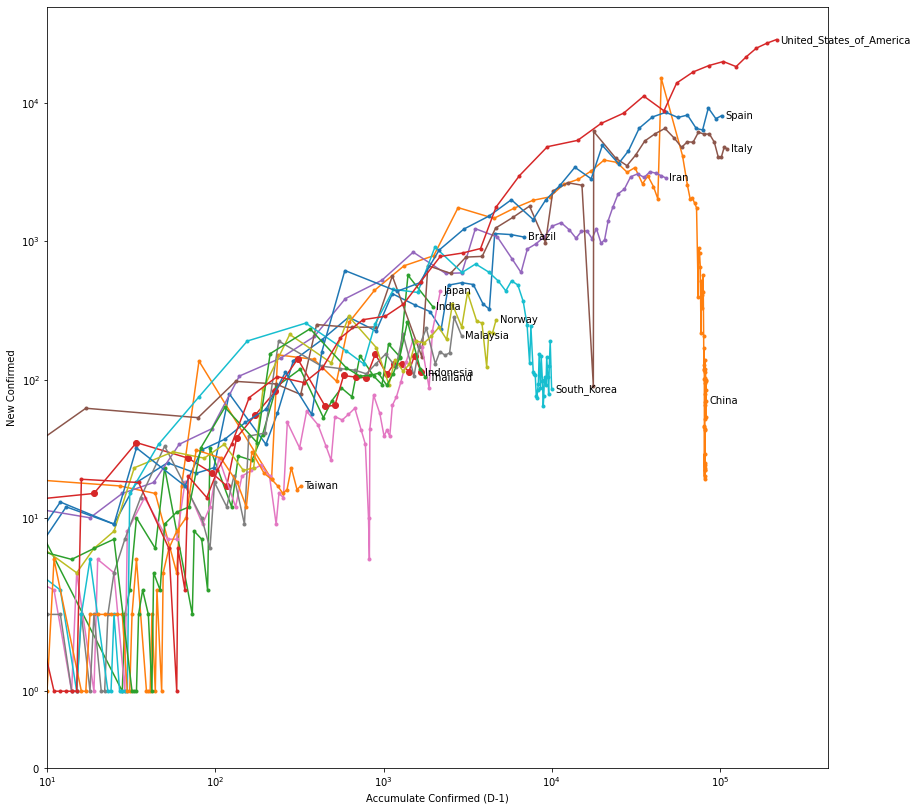

In [9]:
plt.figure(figsize=(14,14))
for c in df3.geoId.unique():
    df4 = df3[df3.geoId == c].sort_values(by='total_cases_before')
    if not len(df4): continue
    marker = 'o-' if c == 'ID' else '.-'
    label = df4.countriesAndTerritories.iloc[0]
    plt.plot(df4['total_cases_before'], df4['cases'], marker, label=label)
    plt.annotate(label, xy=(df4['total_cases_before'].iloc[-1] *1.05, df4['cases'].iloc[-1] *0.95), textcoords='data')
    if len(df4['total_cases_before']) and len(df4['cases']):
        print((df4['total_cases_before'].iloc[-1], df4['cases'].iloc[-1] *1.1), label)
plt.xscale('symlog')
plt.yscale('symlog')
plt.axis(xmin=10,ymin=0)
#plt.legend(ncol=len(df3.countriesAndTerritories.unique())//20+1,loc='center left', bbox_to_anchor=(1, 0.5))

plt.xlabel('Accumulate Confirmed (D-1)')
plt.ylabel('New Confirmed')

plt.savefig(f'{today_str}_new_vs_accum.png')

01 January 2020
01 January 2020
11 January 2020
21 January 2020
31 January 2020
10 February 2020
20 February 2020
01 March 2020
11 March 2020
21 March 2020
31 March 2020
01 January 2020


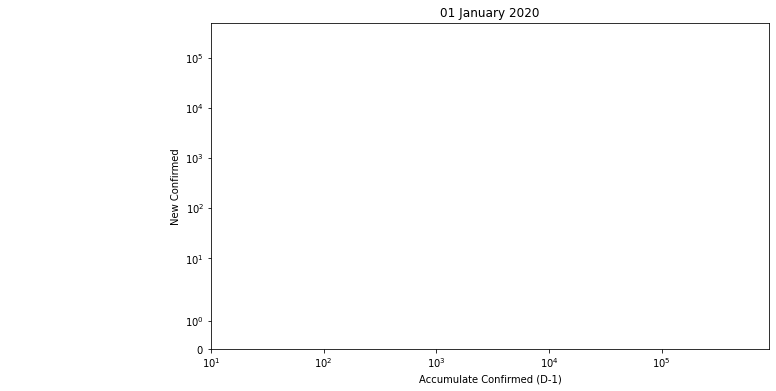

In [10]:
df3 = (df2[df2.geoId.isin(COUNTRIES) & df2.cases.gt(0)]
       [['countriesAndTerritories', 'geoId', 'total_cases_before', 'cases', 'dateRep']])

fig = plt.figure(figsize=(10,6))

num = (datetime.date.today() - datetime.date(2020,1,1)).days - 1
d = np.datetime64('2020-01-01')
def animate(i):
    i = min(i, num)
    if i%10 == 0:
        print((d+i).astype(datetime.datetime).strftime('%d %B %Y'))
    fig.clear()
    for c in df3.geoId.unique():
        df4 = df3[df3.geoId.eq(c) & df3.dateRep.lt(d+i+1)].sort_values(by=['total_cases_before'])
        marker = 'o-' if c == 'ID' else '.-'
        label = df3[df3.geoId.eq(c)].countriesAndTerritories.iloc[0]
        plt.plot(df4['total_cases_before'], df4['cases'], marker, label=label)
        if len(df4['total_cases_before']):
            plt.annotate(label, (df4['total_cases_before'].iloc[-1] * 1.05, df4['cases'].iloc[-1] * 0.95))
    plt.xscale('symlog')
    plt.yscale('symlog')
    plt.title((d+i).astype(datetime.datetime).strftime('%d %B %Y'))
    plt.axis(xmin=10,ymin=0,xmax=900000,ymax=500000)
    #plt.legend(ncol=len(df3.countriesAndTerritories.unique())//20+1,loc='center left', bbox_to_anchor=(1, 0.5))

    plt.xlabel('Accumulate Confirmed (D-1)')
    plt.ylabel('New Confirmed')
    
ani = animation.FuncAnimation(fig, animate, num+60, interval=200) 
ani.save(f'{today_str}_animation_new_vs_accum.mp4')

In [11]:
df3 = df2[df2.geoId.isin(COUNTRIES) & df2.cases.gt(0)][['countriesAndTerritories', 'geoId', 'total_cases_before', 'cases', 'popData2018']]
df3['cases'] = df3.cases * 100.0 / df3.popData2018
df3['total_cases_before'] = df3.total_cases_before * 100.0 / df3.popData2018

Text(0, 0.5, 'New Confirmed %')

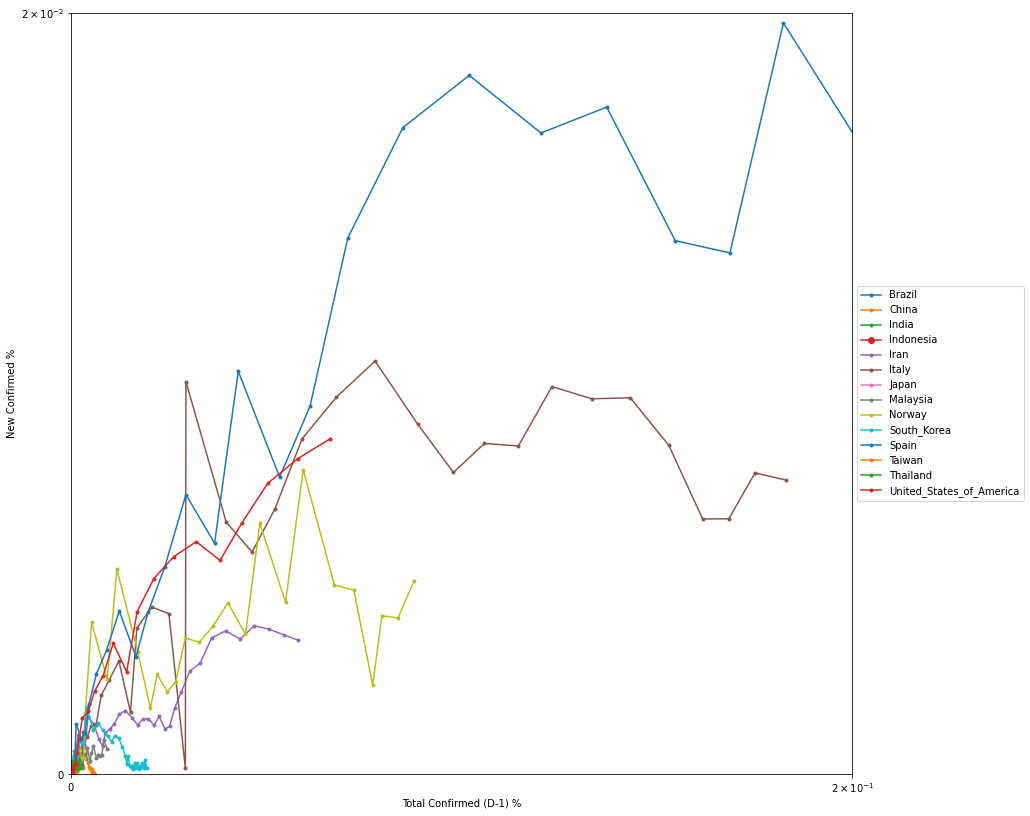

In [12]:
plt.figure(figsize=(14,14))
for c in df3.geoId.unique():
    df4 = df3[df3.geoId == c]
    marker = 'o-' if c == 'ID' else '.-'
    plt.plot(df4['total_cases_before'], df4['cases'], marker, label=df4.countriesAndTerritories.iloc[0])
plt.xscale('symlog')
plt.yscale('symlog')
plt.axis(xmin=0,ymin=0,xmax=0.2,ymax=0.02)
plt.legend(ncol=len(df3.countriesAndTerritories.unique())//20+1,loc='center left', bbox_to_anchor=(1, 0.5))

plt.xlabel('Total Confirmed (D-1) %')
plt.ylabel('New Confirmed %')

In [13]:
plt.savefig(f'{today_str}_new_vs_accum_pct.png')

<Figure size 432x288 with 0 Axes>